# Arbol de Decisión para Fuga de Clientes en Banco #

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [34]:
from google.colab import files
uploaded = files.upload()

Saving Dataset_Fuga_Arbol.csv to Dataset_Fuga_Arbol.csv


In [35]:
# Import pandas
import pandas as pd

# Assign the filename: file
file = 'Dataset_Fuga_Arbol.csv'

# Read the file into a DataFrame: df
df = pd.read_csv(file)

# View the head of the DataFrame
df.head(11)

,Id_Cliente,Programa_Puntos_Gasolina,Tarjeta_Black,Millas_Acumuladas,Facturacion_Tarjeta_Mes_Anterior_USD,Total_Transacciones,Facturacion_Internacional_USD,Total_Compras_Internacionales,Llamadas_a_su_Ejecutivo,Churn
0,1,No,Si,26100,1309,44,84,3,1,Vigente
1,2,No,Si,27230,1025,49,116,3,1,Vigente
2,3,No,No,1140,1080,46,104,5,0,Vigente
3,4,Si,No,710,1153,28,0,7,2,Vigente
4,5,Si,No,1130,893,45,0,3,3,Vigente
5,6,Si,No,980,1166,39,0,6,0,Vigente
6,7,No,Si,24880,1355,35,0,7,3,Vigente
7,8,Si,No,790,807,32,0,6,0,Vigente
8,9,No,No,970,1269,39,76,4,1,Vigente
9,10,Si,Si,37840,1388,34,80,5,0,Vigente


In [36]:
bank_arr = np.array(df.columns)
bank_arr

array(['Id_Cliente', 'Programa_Puntos_Gasolina', 'Tarjeta_Black',
       'Millas_Acumuladas', 'Facturacion_Tarjeta_Mes_Anterior_USD',
       'Total_Transacciones', 'Facturacion_Internacional_USD',
       'Total_Compras_Internacionales', 'Llamadas_a_su_Ejecutivo',
       'Churn'], dtype=object)

In [37]:
def unique_value_check():
    len_col_bank = len(bank_arr)
    print("Column Name : No. of unique value")
    print("---------------------------------")
    for i in range(1,len_col_bank):
        val = len(np.unique(df[bank_arr[i]]))
        print(i," : ",bank_arr[i],":",val,end='\t')
        if(val<10):
            print("---> ",df[bank_arr[i]].unique().tolist())
        else:
            print("---> [Too Much Values]")
unique_value_check()

Column Name : No. of unique value
---------------------------------
1  :  Programa_Puntos_Gasolina : 2	--->  ['No', 'Si']
2  :  Tarjeta_Black : 2	--->  ['Si', 'No']
3  :  Millas_Acumuladas : 1097	---> [Too Much Values]
4  :  Facturacion_Tarjeta_Mes_Anterior_USD : 448	---> [Too Much Values]
5  :  Total_Transacciones : 54	---> [Too Much Values]
6  :  Facturacion_Internacional_USD : 25	---> [Too Much Values]
7  :  Total_Compras_Internacionales : 21	---> [Too Much Values]
8  :  Llamadas_a_su_Ejecutivo : 10	---> [Too Much Values]
9  :  Churn : 2	--->  ['Vigente', 'Fugado']


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Id_Cliente                            5000 non-null   int64 
 1   Programa_Puntos_Gasolina              5000 non-null   object
 2   Tarjeta_Black                         5000 non-null   object
 3   Millas_Acumuladas                     5000 non-null   int64 
 4   Facturacion_Tarjeta_Mes_Anterior_USD  5000 non-null   int64 
 5   Total_Transacciones                   5000 non-null   int64 
 6   Facturacion_Internacional_USD         5000 non-null   int64 
 7   Total_Compras_Internacionales         5000 non-null   int64 
 8   Llamadas_a_su_Ejecutivo               5000 non-null   int64 
 9   Churn                                 5000 non-null   object
dtypes: int64(7), object(3)
memory usage: 390.8+ KB


In [39]:
df.describe()

,Id_Cliente,Millas_Acumuladas,Facturacion_Tarjeta_Mes_Anterior_USD,Total_Transacciones,Facturacion_Internacional_USD,Total_Compras_Internacionales,Llamadas_a_su_Ejecutivo
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,8755.494000,1029.574400,40.014200,69.171200,4.435200,1.570400
std,1443.520003,13548.020019,179.218282,7.940063,46.031077,2.456788,1.306363
min,1.000000,0.000000,396.000000,0.000000,0.000000,0.000000,0.000000
25%,1250.750000,920.000000,909.000000,35.000000,0.000000,3.000000,1.000000
50%,2500.500000,1095.000000,1030.000000,40.000000,84.000000,4.000000,1.000000
75%,3750.250000,17850.000000,1148.000000,45.000000,100.000000,6.000000,2.000000
max,5000.000000,53140.000000,1657.000000,66.000000,168.000000,20.000000,9.000000


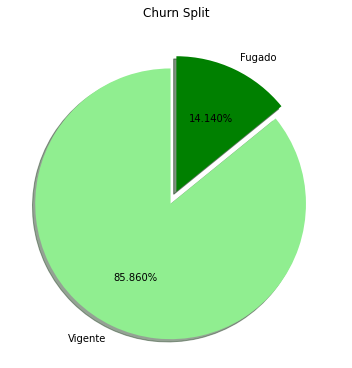

In [40]:
from collections import Counter

labels, values = zip(*Counter(df["Churn"]).items())
colors = ['lightgreen', 'green']
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()

fig = plt.figure(figsize=[5, 5])

plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=90,explode=(0.1,0),autopct="%1.3f%%", shadow=True, colors=colors)
plt.tight_layout()
plt.title("Churn Split")
plt.show()

In [43]:
df2 = df.drop(['Id_Cliente'],axis=1)
df2 = df2.apply(LabelEncoder().fit_transform)
df2.head(11)

,Programa_Puntos_Gasolina,Tarjeta_Black,Millas_Acumuladas,Facturacion_Tarjeta_Mes_Anterior_USD,Total_Transacciones,Facturacion_Internacional_USD,Total_Compras_Internacionales,Llamadas_a_su_Ejecutivo,Churn
0,0,1,438,352,31,3,3,1,1
1,0,1,479,223,36,11,3,1,1
2,0,0,76,248,33,8,5,0,1
3,1,0,33,281,15,0,7,2,1
4,1,0,75,163,32,0,3,3,1
5,1,0,60,287,26,0,6,0,1
6,0,1,380,373,22,0,7,3,1
7,1,0,41,124,19,0,6,0,1
8,0,0,59,334,26,1,4,1,1
9,1,1,894,388,21,2,5,0,1


In [44]:
#Spliting df to features data and target data
X = df2.iloc[:,:-1]
y = df2[["Churn"]]

In [45]:
#Spliting of Training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [46]:
#scaling the data
scaler = StandardScaler()
SS_X_train = scaler.fit_transform(X_train)
SS_X_test = scaler.fit_transform(X_test)

In [47]:
# accuracy in different level for gini index
list_accuracy = []
for i in range(1,25):
  dtree_g_l = DecisionTreeClassifier(criterion='gini',max_depth=i)
  dtree_g_l.fit(SS_X_train,y_train)
  predictions_l = dtree_g_l.predict(SS_X_test)
  acc_gini_l = accuracy_score(y_test,predictions_l)*100
  list_accuracy.append(acc_gini_l)
  print("Accuracy: {} % for depth= {}".format(acc_gini_l,i)) 
print("\nMaximum Accuracy is {} % for depth= {}".format(max(list_accuracy),(list_accuracy.index(max(list_accuracy))+1)))

Accuracy: 90.60000000000001 % for depth= 1
Accuracy: 92.80000000000001 % for depth= 2
Accuracy: 94.6 % for depth= 3
Accuracy: 96.0 % for depth= 4
Accuracy: 97.8 % for depth= 5
Accuracy: 97.8 % for depth= 6
Accuracy: 97.8 % for depth= 7
Accuracy: 97.2 % for depth= 8
Accuracy: 97.2 % for depth= 9
Accuracy: 96.8 % for depth= 10
Accuracy: 96.8 % for depth= 11
Accuracy: 96.39999999999999 % for depth= 12
Accuracy: 96.0 % for depth= 13
Accuracy: 95.39999999999999 % for depth= 14
Accuracy: 95.19999999999999 % for depth= 15
Accuracy: 95.39999999999999 % for depth= 16
Accuracy: 95.19999999999999 % for depth= 17
Accuracy: 94.8 % for depth= 18
Accuracy: 94.0 % for depth= 19
Accuracy: 94.8 % for depth= 20
Accuracy: 94.19999999999999 % for depth= 21
Accuracy: 94.19999999999999 % for depth= 22
Accuracy: 94.8 % for depth= 23
Accuracy: 94.6 % for depth= 24

Maximum Accuracy is 97.8 % for depth= 5


In [48]:
dtree_g = DecisionTreeClassifier(criterion='gini',max_depth=5)
dtree_g.fit(SS_X_train,y_train)
predictions = dtree_g.predict(SS_X_test)

In [50]:
important_gini = dtree_g.feature_importances_
important_f_gini = pd.Series(important_gini, X.columns[:])
important_f_gini.sort_values(ascending=False, inplace=True)
important_f_gini

Facturacion_Tarjeta_Mes_Anterior_USD    0.496755
Llamadas_a_su_Ejecutivo                 0.130674
Tarjeta_Black                           0.120529
Programa_Puntos_Gasolina                0.086908
Facturacion_Internacional_USD           0.082477
Total_Compras_Internacionales           0.081959
Total_Transacciones                     0.000698
Millas_Acumuladas                       0.000000
dtype: float64

In [51]:
cla_gini = classification_report(y_test,predictions)
print("Classification Report:\n\n",cla_gini)

Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.82      0.90        62
           1       0.98      1.00      0.99       438

    accuracy                           0.98       500
   macro avg       0.99      0.91      0.95       500
weighted avg       0.98      0.98      0.98       500



In [52]:
con_gini = confusion_matrix(y_test,predictions)
print("Confusion matrix:\n\n",con_gini)

Confusion matrix:

 [[ 51  11]
 [  0 438]]


In [53]:
acc_gini = accuracy_score(y_test,predictions)*100
print("Accuracy:",acc_gini,"%")

Accuracy: 97.8 %


In [57]:
dtree_e = DecisionTreeClassifier(criterion='gini',max_depth=5, min_samples_split = 80)
dtree_e.fit(SS_X_train,y_train)
predictions = dtree_e.predict(SS_X_test)

In [58]:
#importing requires Libraries
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

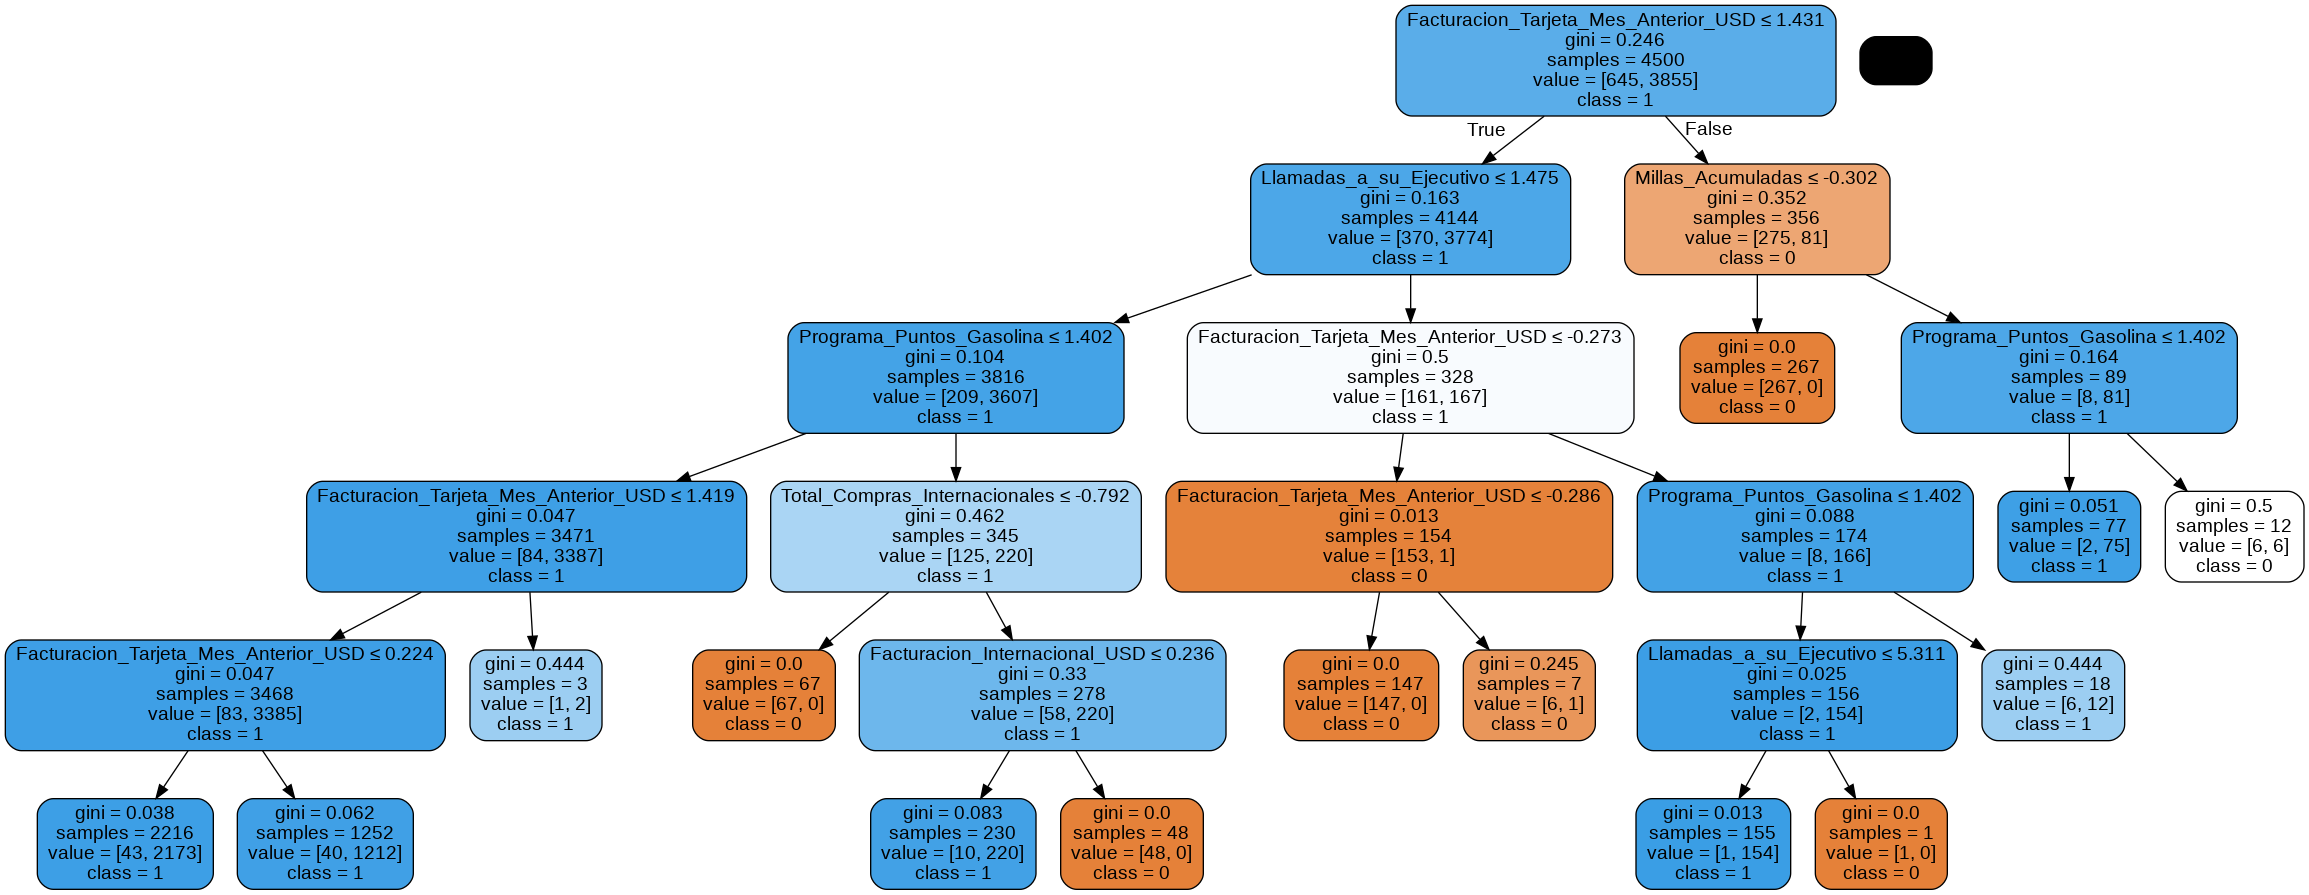

In [59]:
dot_data = StringIO()
export_graphviz(dtree_e, out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True,
                feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())